In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import torch
import os

from custom_metrics import torch_acc

from train_basic_metaclassifiers import EXP_NUM, model_names, models

from joblib import dump, load


# calculate accuracy for all models in basic_metaclassifiers

# read data
def read_data(folder_path, meta_path, lambda_path):
    full_meta_path = os.path.join(folder_path, meta_path)
    full_lambda_path = os.path.join(folder_path, lambda_path)
    data = np.load(full_meta_path, allow_pickle=True).reshape(-1, 27)
    target = np.load(full_lambda_path, allow_pickle=True)
    return data, target


train_data, train_target = read_data(folder_path='precalculated_data',
                                     meta_path='train_meta_tensors.npy',
                                     lambda_path='train_lambda_lambda_tensors.npy')

test_data, test_target = read_data(folder_path='precalculated_data',
                                   meta_path='test_meta_tensors.npy',
                                   lambda_path='test_lambda_lambda_tensors.npy')


def load_models_weights():
    models_dict = {model_name: [] for model_name in model_names}
    for exp_id in range(EXP_NUM):
        for model_id in range(len(model_names)):
            model_name = model_names[model_id]
            model_path = os.path.join('basic_metaclassifiers', f'{model_name}_model_{exp_id}.joblib')
            model = load(model_path)
            models_dict[model_name].append(model)
    return models_dict


models_dict = load_models_weights()


# calculate accuracy

def calculate_accuracy(model, data, target):
    data = torch.from_numpy(data).float()
    target = torch.from_numpy(target).float()
    print(data.shape, target.shape)
    y_pred = torch.from_numpy(model.predict(data)).float()
    acc = torch_acc(y_pred, target)
    return acc


def calculate_accuracy_for_all_models(models_dict, data, target):
    acc_dict = {model_name: [] for model_name in model_names}
    for model_name in model_names:
        for model in models_dict[model_name]:
            acc = calculate_accuracy(model, data, target)
            acc_dict[model_name].append(acc)
    return acc_dict


accuracy = calculate_accuracy_for_all_models(models_dict, test_data, test_target)




100%|██████████| 25/25 [00:54<00:00,  2.18s/it]


torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size([1911, 27]) torch.Size([1911, 3])
torch.Size

In [2]:
accuracy

{'DecisionTreeClassifier': [tensor(0.5495),
  tensor(0.3820),
  tensor(0.5102),
  tensor(0.5704),
  tensor(0.5693)],
 'KNeighborsClassifier': [tensor(0.4788),
  tensor(0.4788),
  tensor(0.4788),
  tensor(0.4788),
  tensor(0.4788)],
 'SVC': [tensor(0.8687),
  tensor(0.8687),
  tensor(0.8687),
  tensor(0.8687),
  tensor(0.8687)],
 'LogisticRegression': [tensor(1.1722),
  tensor(1.1722),
  tensor(1.1722),
  tensor(1.1722),
  tensor(1.1722)],
 'SimpleMetaNeuralNetwork': [tensor(0.3370),
  tensor(0.4490),
  tensor(0.3501),
  tensor(0.2878),
  tensor(0.3475)]}

In [5]:
models_dict['DecisionTreeClassifier'][0].predict(test_data)

array([[0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 1.]], dtype=float32)

In [6]:
import torch
import os
from tqdm.notebook import tqdm

In [8]:
from Models import DeepSetModelV5, CONFIG

model = DeepSetModelV5(hidden_size_0=CONFIG.hidden_size_0,
                                  hidden_size_1=CONFIG.hidden_size_1,
                                  predlast_hidden_size=CONFIG.predlast_hidden_size,
                                  meta_size=CONFIG.meta_size,
                                  out_classes=CONFIG.out_classes)

paths = [i for i in os.listdir('basic_metaclassifiers')]

models = []

for i in tqdm(range(5)):
    model = DeepSetModelV5(hidden_size_0=CONFIG.hidden_size_0,
                                  hidden_size_1=CONFIG.hidden_size_1,
                                  predlast_hidden_size=CONFIG.predlast_hidden_size,
                                  meta_size=CONFIG.meta_size,
                                  out_classes=CONFIG.out_classes)
    model.load_state_dict(torch.load(os.path.join('basic_metaclassifiers', f'deepset_model_{i}.pkl'), map_location=torch.device('cpu')))
    models.append(model)

  0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
list(models[0].parameters())[0] - list(models[4].parameters())[0]

tensor([[-0.0377, -0.0039,  0.0265,  ...,  0.0172,  0.0384,  0.0300],
        [-0.0112, -0.0059,  0.0008,  ...,  0.0337,  0.0390,  0.0423],
        [ 0.0462,  0.0355, -0.0338,  ..., -0.0711, -0.0216, -0.0699],
        ...,
        [ 0.0025, -0.0052, -0.0107,  ...,  0.0008,  0.0215, -0.0095],
        [-0.0157, -0.0270, -0.0491,  ..., -0.0111,  0.0039, -0.0722],
        [ 0.0451,  0.0394, -0.0250,  ..., -0.0627, -0.0163, -0.0507]],
       grad_fn=<SubBackward0>)

In [15]:
list(models[0].parameters())[5] - list(models[4].parameters())[5]

tensor([[ 0.0305,  0.0271,  0.1329, -0.0110,  0.0185,  0.0334,  0.0211,  0.0118,
          0.0739,  0.0641,  0.0857,  0.0288,  0.1209, -0.0201,  0.0132,  0.0735,
          0.0445,  0.0487,  0.0635,  0.0216,  0.0122,  0.0491,  0.0642, -0.0019,
          0.0283,  0.0452,  0.0092,  0.0388,  0.0428,  0.0584,  0.0346,  0.0777,
          0.0530, -0.0065,  0.0373, -0.0140,  0.0061,  0.0418,  0.0710,  0.0557,
          0.1081,  0.0712,  0.0007,  0.0728, -0.0512,  0.0138, -0.0079,  0.0311,
          0.0000,  0.0000, -0.0041,  0.0411,  0.0529,  0.0137,  0.0357,  0.0303,
          0.0000,  0.0584,  0.0235,  0.0078,  0.1221,  0.0683,  0.0567,  0.0600]],
       grad_fn=<SubBackward0>)

In [21]:
from DatasetLoader import get_deepset_loader

dataloader = get_deepset_loader()

shapes = Counter({(2, 64, 16): 8000})
../processed_data/processed_16_64_2/
Loaded from file system
shape = (1024000, 16)
shapes = Counter({(2, 64, 16): 1911})
shape = (244608, 16)


In [30]:
X_p, X_n, meta, target = dataloader.dataset[0]
X_p = X_p.unsqueeze(-1)
X_n = X_n.unsqueeze(-1)
meta = meta.unsqueeze(-1)

In [28]:
X_p.shape, X_n.shape, meta

(torch.Size([18, 64]),
 torch.Size([18, 64]),
 tensor([-0.6272, -0.6627, -0.8935,  0.7258, -0.1030,  0.1868, -0.5523,  0.0000,
         -0.4468, -0.5576, -0.5576, -0.7380, -0.5120, -0.4468, -0.6409, -0.7380,
         -0.1721,  0.0695, -0.4493, -0.5645, -0.2273, -0.8734, -0.5439, -0.5576,
         -0.3021, -0.5576, -0.3658]))

In [32]:
X_p, X_n, meta, target = next(iter(dataloader))

In [35]:
torch.sigmoid(models[2](X_p, X_n, meta)) - torch.sigmoid(models[0](X_p, X_n, meta))

tensor([[-0.0743,  0.1175,  0.0764],
        [ 0.0196,  0.2173,  0.1303],
        [ 0.1276, -0.1556, -0.1004],
        [-0.0590,  0.0125, -0.0099],
        [ 0.2282, -0.0282, -0.1674],
        [-0.1496, -0.1465, -0.4061],
        [ 0.1396,  0.0784,  0.2074],
        [ 0.0642,  0.1019, -0.2288],
        [ 0.3530,  0.4251,  0.2282],
        [-0.0971,  0.1324,  0.1710],
        [ 0.0951, -0.0126,  0.0016],
        [-0.2782, -0.3612,  0.0155],
        [-0.0860, -0.0518,  0.0351],
        [ 0.1121, -0.4778, -0.0467],
        [-0.0180, -0.0488,  0.0832],
        [ 0.5003,  0.3205,  0.3704]], grad_fn=<SubBackward0>)

In [37]:
from custom_metrics import torch_acc_numerator

In [38]:
accs = []

for model in models:
    acc = 0
    for X_p, X_n, meta, target in dataloader:
        y_pred = torch.sigmoid(model(X_p, X_n, meta))
        acc_ = torch_acc_numerator(y_pred, target)
        acc += acc_
    acc = acc / len(dataloader.dataset)
    accs.append(acc)

/Users/garipovroma/work/itmo/diploma/diploma/MetaLearning-GAN/meta_gan/deepsets/deepsetlayers.py:146: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1673079119134/work/aten/src/ATen/native/IndexingUtils.h:28.)
  Y[mask] = (X @ self.alpha + h_inv.unsqueeze(1))[mask]
/Users/garipovroma/work/itmo/diploma/diploma/MetaLearning-GAN/meta_gan/deepsets/deepsetlayers.py:146: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1673079119134/work/aten/src/ATen/native/IndexingUtils.h:28.)
  Y[mask] = (X @ self.alpha + h_inv.unsqueeze(1))[mask]
/Users/garipovroma/work/itmo/diploma/diploma/MetaLearning-GAN/meta_gan/deepsets/deepsetlayers.py:146: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instea

In [39]:
accs

[tensor(0.5531),
 tensor(0.5568),
 tensor(0.5552),
 tensor(0.5515),
 tensor(0.5311)]

In [16]:
from sklearn import tree

In [17]:
from joblib import dump, load

In [18]:
trees = [load(os.path.join('basic_metaclassifiers', f'DecisionTreeClassifier_model_{i}.joblib')) for i in range(5)]

[Text(0.41346153846153844, 0.9166666666666666, 'x[6] <= -0.251\ngini = 0.472\nsamples = 8000\nvalue = [[4585, 3415]\n[4868, 3132]\n[5255, 2745]]'),
 Text(0.1346153846153846, 0.75, 'x[5] <= -4.395\ngini = 0.418\nsamples = 3408\nvalue = [[1248, 2160]\n[2725, 683]\n[2130, 1278]]'),
 Text(0.038461538461538464, 0.5833333333333334, 'x[20] <= 0.167\ngini = 0.076\nsamples = 202\nvalue = [[12, 190]\n[5, 197]\n[7, 195]]'),
 Text(0.019230769230769232, 0.4166666666666667, 'gini = 0.0\nsamples = 190\nvalue = [[0, 190]\n[0, 190]\n[0, 190]]'),
 Text(0.057692307692307696, 0.4166666666666667, 'x[18] <= 0.82\ngini = 0.324\nsamples = 12\nvalue = [[12, 0]\n[5, 7]\n[7, 5]]'),
 Text(0.038461538461538464, 0.25, 'x[1] <= -0.537\ngini = 0.28\nsamples = 10\nvalue = [[10, 0]\n[3, 7]\n[7, 3]]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [[4, 0]\n[0, 4]\n[4, 0]]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.333\nsamples = 6\nvalue = [[6, 0]\n[3, 3]\n[3, 3]]'

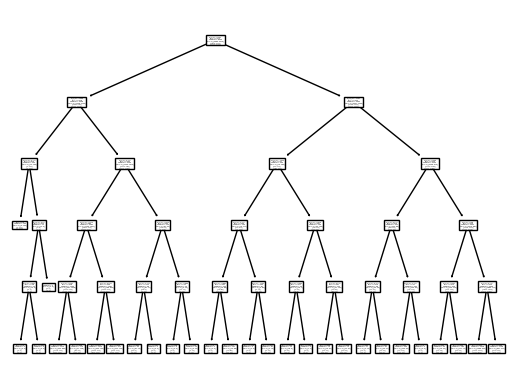

In [19]:
tree.plot_tree(trees[0])

[Text(0.42592592592592593, 0.9166666666666666, 'x[6] <= -0.251\ngini = 0.472\nsamples = 8000\nvalue = [[4585, 3415]\n[4868, 3132]\n[5255, 2745]]'),
 Text(0.14814814814814814, 0.75, 'x[5] <= -4.395\ngini = 0.418\nsamples = 3408\nvalue = [[1248, 2160]\n[2725, 683]\n[2130, 1278]]'),
 Text(0.037037037037037035, 0.5833333333333334, 'x[25] <= -0.621\ngini = 0.076\nsamples = 202\nvalue = [[12, 190]\n[5, 197]\n[7, 195]]'),
 Text(0.018518518518518517, 0.4166666666666667, 'gini = 0.0\nsamples = 190\nvalue = [[0, 190]\n[0, 190]\n[0, 190]]'),
 Text(0.05555555555555555, 0.4166666666666667, 'x[4] <= -1.982\ngini = 0.324\nsamples = 12\nvalue = [[12, 0]\n[5, 7]\n[7, 5]]'),
 Text(0.037037037037037035, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(0.07407407407407407, 0.25, 'x[0] <= 14.266\ngini = 0.28\nsamples = 10\nvalue = [[10, 0]\n[3, 7]\n[7, 3]]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.32\nsamples = 5\nvalue = [[5, 0]\n[3, 2]\n[2, 3]]'),
 Text(0.09259

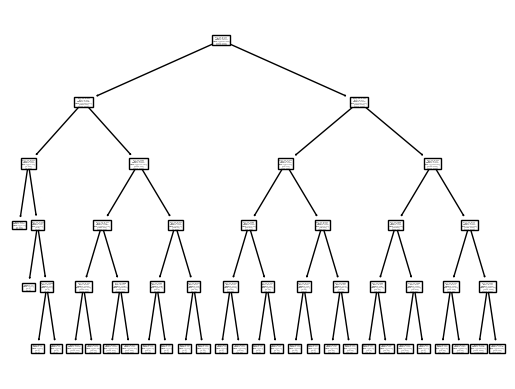

In [20]:
tree.plot_tree(trees[1])